In [1]:
%matplotlib inline

import os.path as path
import stripy as stripy
import numpy as np

import matplotlib.pyplot as plt

In [2]:
## A bunch of meshes with roughly similar overall numbers of points / triangles

octo0  = stripy.octahedral_mesh(include_face_points=False, refinement_levels=0)
octo2  = stripy.octahedral_mesh(include_face_points=False, refinement_levels=2)
octoR  = stripy.octahedral_mesh(include_face_points=False, refinement_levels=5)

print "Octahedral mesh \t\t\t", octo0.npoints, octoR.npoints

octoF0  = stripy.octahedral_mesh(include_face_points=True, refinement_levels=0)
octoF2  = stripy.octahedral_mesh(include_face_points=True, refinement_levels=2)
octoFR  = stripy.octahedral_mesh(include_face_points=True, refinement_levels=4)

print "Octahedral mesh with faces\t\t", octoF0.npoints, octoFR.npoints

cube0 = stripy.triangulated_cube_mesh(refinement_levels=0)
cube2 = stripy.triangulated_cube_mesh(refinement_levels=2)
cubeR = stripy.triangulated_cube_mesh(refinement_levels=5)

print "Cube mesh \t\t\t\t", cube0.npoints, cubeR.npoints

ico0 = stripy.icosahedral_mesh(refinement_levels=0)
ico2 = stripy.icosahedral_mesh(refinement_levels=2)
icoR = stripy.icosahedral_mesh(refinement_levels=4)

print "Icosahedral mesh \t\t\t", ico0.npoints, icoR.npoints

icoF0 = stripy.icosahedral_mesh(refinement_levels=0, include_face_points=True)
icoF2 = stripy.icosahedral_mesh(refinement_levels=2, include_face_points=True)
icoFR = stripy.icosahedral_mesh(refinement_levels=4, include_face_points=True)

print "Icosahedral mesh with faces \t\t", icoF0.npoints, icoFR.npoints

socc0 = stripy.triangulated_soccerball_mesh(refinement_levels=0)
socc2 = stripy.triangulated_soccerball_mesh(refinement_levels=1)
soccR = stripy.triangulated_soccerball_mesh(refinement_levels=3)

print "BuckyBall mesh \t\t\t\t", socc0.npoints, soccR.npoints

## Need a reproducible hierarchy ... 
ring0 = stripy.uniform_ring_mesh(resolution=6, refinement_levels=0)

lon, lat = ring0.uniformly_refine_triangulation()
ring1 = stripy.sTriangulation(lon, lat)

lon, lat = ring1.uniformly_refine_triangulation()
ring2 = stripy.sTriangulation(lon, lat)

lon, lat = ring2.uniformly_refine_triangulation()
ring3 = stripy.sTriangulation(lon, lat)

lon, lat = ring3.uniformly_refine_triangulation()
ringR = stripy.sTriangulation(lon, lat)



# ring2 = stripy.uniform_ring_mesh(resolution=6, refinement_levels=2)
# ringR = stripy.uniform_ring_mesh(resolution=6, refinement_levels=4)

print "Ring mesh (9)\t\t\t\t", ring0.npoints, ringR.npoints

# xyz =  np.random.random((5000,3)) * 2.0 - 1.0
# xyz /= np.sqrt(xyz[:,0]**2 + xyz[:,1]**2 + xyz[:,2]**2).reshape(-1,1)

# lon,lat = stripy.spherical.xyz2lonlat(xyz[:,0], xyz[:,1], xyz[:,2])

# randR = stripy.sTriangulation(lon, lat)

randR = stripy.random_mesh(number_of_points=5000)
rand0 = stripy.sTriangulation(lons=randR.lons[::50],lats=randR.lats[::50])
rand2 = stripy.sTriangulation(lons=randR.lons[::25],lats=randR.lats[::25])

print "Random mesh (6)\t\t\t\t", rand0.npoints, randR.npoints

## A list of all the 



Octahedral mesh 			6 4098
Octahedral mesh with faces		14 3074
Cube mesh 				8 6146
Icosahedral mesh 			12 2562
Icosahedral mesh with faces 		32 7682
BuckyBall mesh 				92 5762
Ring mesh (9)				45 11010
Random mesh (6)				100 5000


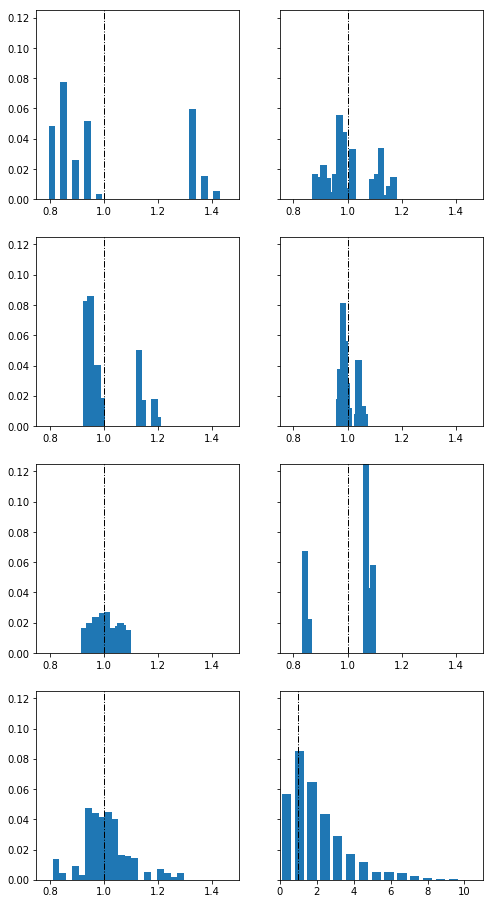

In [3]:
## How best to make this a meaningful plot ?

def area_histo(mesh):
    
    freq, area_bin = np.histogram(mesh.areas(), bins=20)
    area = 0.5 * (area_bin[1:] + area_bin[:-1])
    (area * freq)
    norm_area = area / mesh.areas().mean()
    
    return norm_area, 0.25 * freq*area / np.pi**2

def add_plot(axis, mesh, xlim, ylim):
    u, v = area_histo(mesh)
    axis.bar(u, v, width=0.025)
    axis.set_xlim(xlim)
    axis.set_ylim(ylim)
    axis.plot([1.0,1.0], [0.0,1.5], linewidth=1.0, linestyle="-.", color="Black")

    return



fig = plt.figure(figsize=(8,16))
ax = fig.subplots(4,2, sharey=True)

xlim=(0.75,1.5)
ylim=(0.0,0.125)

# octahedron

add_plot(ax[0,0], octoR, xlim, ylim)

# octahedron + faces

add_plot(ax[0,1], octoFR, xlim, ylim)


# icosahedron

add_plot(ax[1,0], icoR, xlim, ylim)

# icosahedron + faces

add_plot(ax[1,1], icoFR, xlim, ylim)


# cube

add_plot(ax[2,0], cubeR, xlim, ylim)

# C60

add_plot(ax[2,1], soccR, xlim, ylim)


# ring

add_plot(ax[3,0], ringR, xlim, ylim)

# random (this one is very different from the others ... )

axis=ax[3,1]
u, v = area_histo(randR)
axis.bar(u, v, width=0.5)
axis.set_xlim(0.0,11.0)
axis.set_ylim(0,0.125)
axis.plot([1.0,1.0], [0.0,1.5], linewidth=1.0, linestyle="-.", color="Black")


fig.savefig("AreaDistributionsByMesh.png", dpi=250, transparent=True)


#ax.bar(norm_area, area*freq, width=0.01)


In [15]:
import lavavu

striangulation0 = icoF0
striangulationR = icoF2

wireframeI = striangulation0
trianglesI = striangulation0
nodes1I = striangulation0
nodes2I = striangulationR


lv = lavavu.Viewer(border=False, resolution=[500,500], background="#FFFFFF")
lv["axis"]=False

tris = lv.triangles("triangulation",  wireframe=True, colour="#444444", opacity=0.8)
tris.vertices(wireframeI.points)
tris.indices(wireframeI.simplices)

tris2 = lv.triangles("triangles",  wireframe=False, colour="#007f00", opacity=0.5)
tris2.vertices(trianglesI.points)
tris2.indices(trianglesI.simplices)

nodes = lv.points("nodes", pointsize=20.0, pointtype="shiny", colour="#448080", opacity=0.95)
nodes.vertices(nodes1I.points)

nodes2 = lv.points("nodes2", pointsize=5.0, pointtype="shiny", colour="FF0000", opacity=0.95)
nodes2.vertices(nodes2I.points)


In [16]:
lv.control.Panel()
lv.control.Range('specular', range=(0,1), step=0.1, value=0)
lv.control.Entry(property='background')
lv.control.Checkbox(property='axis')
lv.control.ObjectList()
lv.control.show()



<IPython.core.display.Javascript object>

In [9]:
## Interesting to view the flattened sphere to see where the points all lie

wireframeI = striangulationR
trianglesI = striangulationR
nodes1I = striangulation0
nodes2I = striangulationR


lv = lavavu.Viewer(border=False, resolution=[1000,600], background="#FFFFFF")

tris = lv.triangles("triangulation",  wireframe=True, colour="#444444", opacity=0.75)
wFvertices = np.stack(( wireframeI.lons, wireframeI.lats, wireframeI.lons * 0.0)).T
wFvertices[:,0] = np.mod(np.pi+wFvertices[:,0], 2.0*np.pi)-np.pi

tris.vertices(wFvertices)
tris.indices(wireframeI.simplices)

nodes = lv.points("nodes", pointsize=10.0, pointtype="shiny", colour="#448080", opacity=1.0)
wFvertices = np.stack(( nodes1I.lons, nodes1I.lats, nodes1I.lons * 0.0)).T
wFvertices[:,0] = np.mod(np.pi+wFvertices[:,0], 2.0*np.pi)-np.pi
nodes.vertices(wFvertices)

# nodes2 = lv.points("nodes2", pointsize=2.0, pointtype="shiny", colour="FF0000", opacity=0.75)
# nodes2.vertices(nodes2I.points)


lv.control.Panel()
lv.control.Range('specular', range=(0,1), step=0.1, value=0)
lv.control.Checkbox(property='axis')
lv.control.ObjectList()
lv.control.show()




<IPython.core.display.Javascript object>

In [10]:
%matplotlib inline

import gdal
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

global_extent     = [-180.0, 180.0, -90.0, 90.0]

projection1 = ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide(central_longitude=-120)
projection3 = ccrs.PlateCarree()
base_projection = ccrs.PlateCarree()

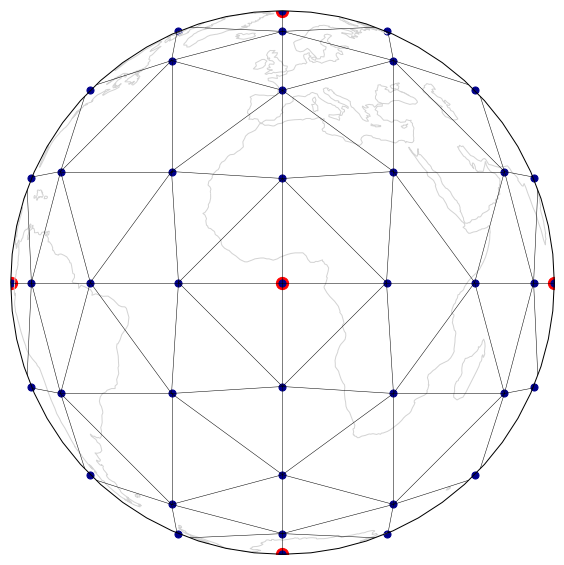

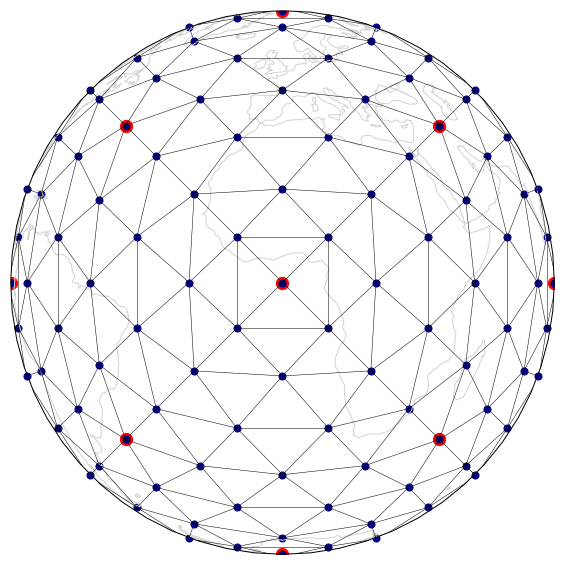

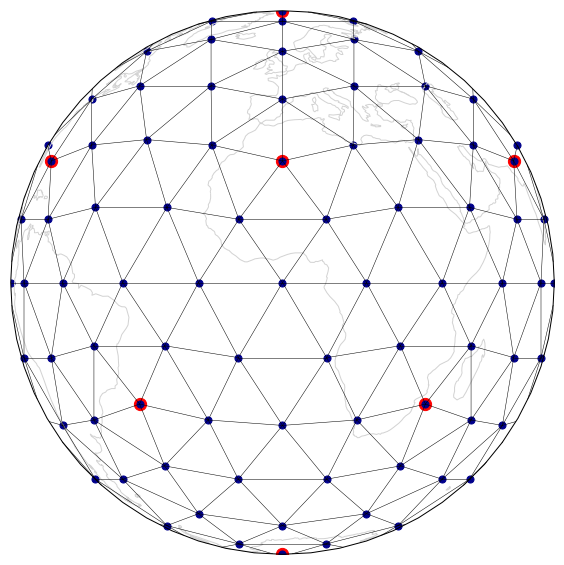

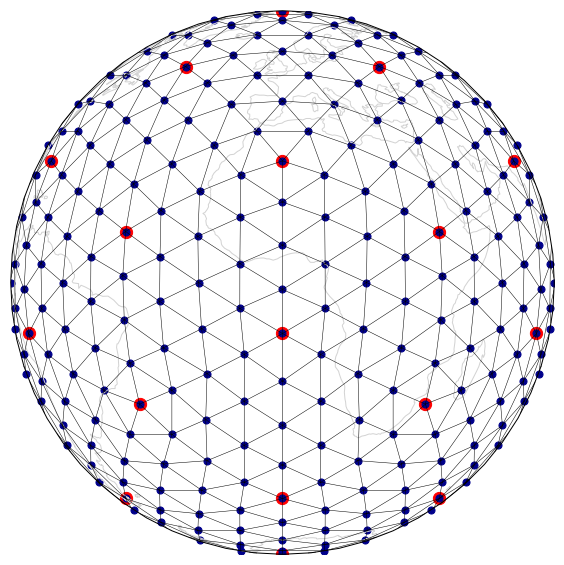

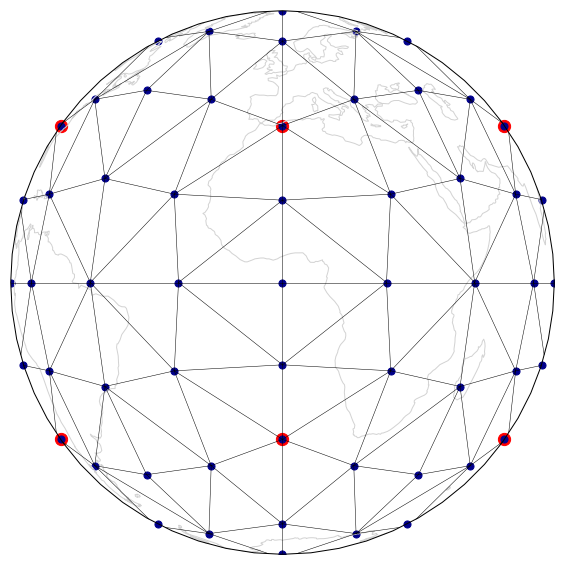

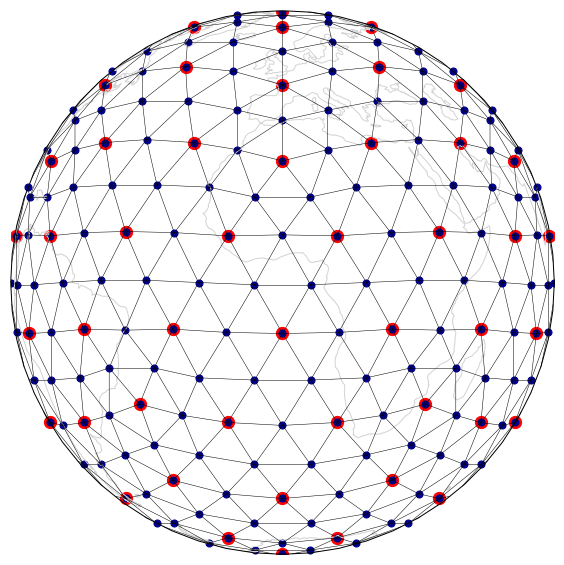

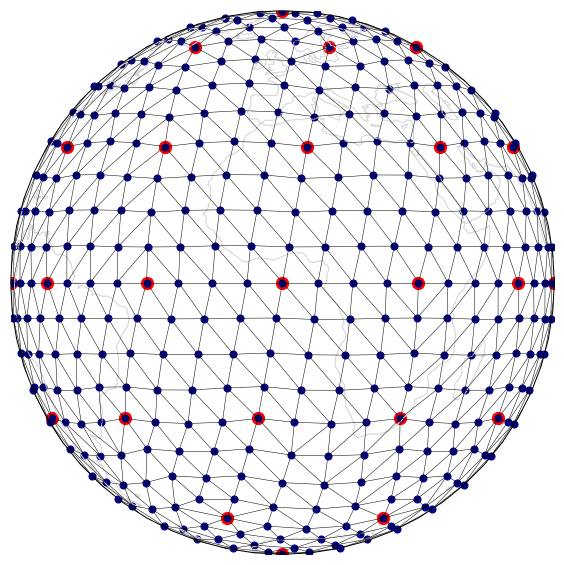

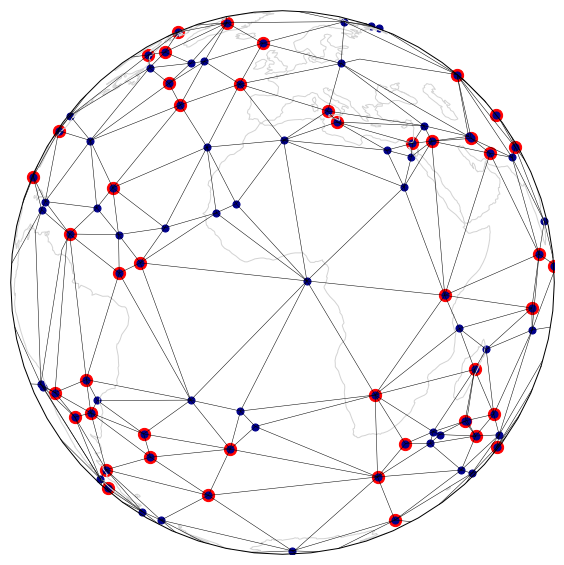

In [11]:
def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None))
    ax.coastlines(color="lightgrey")
    ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr


    ax.scatter(lons0, lats0, color="Red",
                marker="o", s=150.0, transform=ccrs.Geodetic())

    ax.scatter(lonsR, latsR, color="DarkBlue",
                marker="o", s=50.0, transform=ccrs.Geodetic())



    for i in range(0,len(lst),1):
        n1 = lst[i]-1
        n2 = lst[lptr[i]-1]-1
        if n1 < n2:
            ax.plot( [lonsR[n1], lonsR[n2]],
                     [latsR[n1], latsR[n2]], 
                      linewidth=0.5, color="black", transform=ccrs.Geodetic())

    fig.savefig(name, dpi=250, transparent=True)
    
    return

mesh_fig(octo0,  octo2, "Octagon" )
mesh_fig(octoF0, octoF2, "OctagonF" )

mesh_fig(ico0, ico2, "Icosahedron" )
mesh_fig(icoF0, icoF2, "IcosahedronF" )

mesh_fig(cube0, cube2, "Cube")
mesh_fig(socc0, socc2, "SoccerBall")

mesh_fig(ring0, ring2, "Ring")
mesh_fig(rand0, rand2, "Random")





In [14]:
import lavavu

wireframeI = icoF0
trianglesI = icoF0

nodes1I = icoF0
nodes2I = icoF0


lv = lavavu.Viewer(border=False, background="#FFFFFF", resolution=[1000,600], near=-10.0)

tris = lv.triangles("triangulation",  wireframe=True, colour="#444444", opacity=0.8)
tris.vertices(wireframeI.points)
tris.indices(wireframeI.simplices)

tris2 = lv.triangles("triangles",  wireframe=False, colour="#77ff88", opacity=0.8)
tris2.vertices(trianglesI.points)
tris2.indices(trianglesI.simplices)


nodes = lv.points("nodes", pointsize=20.0, pointtype="shiny", colour="#448080", opacity=0.75)
nodes.vertices(nodes1I.points)

nodes2 = lv.points("nodes2", pointsize=5.0, pointtype="shiny", colour="FF0000", opacity=0.75)
nodes2.vertices(nodes2I.points)




lv.control.Panel()
lv.control.Range('specular', range=(0,1), step=0.1, value=0)
lv.control.Checkbox(property='axis')
lv.control.ObjectList()
lv.control.show()



<IPython.core.display.Javascript object>